# Section Library

This examples shows how to use ``sectionproperties``'s section library to create geometry.

## Circular Section

The following example calculates the geometric, warping and plastic properties of a 50 mm diameter circle. The circle is discretised with 64 points and a mesh size of 2.5 mm$^2$.

### Import Modules

We start by importing the [circular_section](../../gen/sectionproperties.pre.library.primitive_sections.circular_section.rst#sectionproperties.pre.library.primitive_sections.circular_section) function from the section library, and the [Section()](../../gen/sectionproperties.analysis.section.Section.rst#sectionproperties.analysis.section.Section) object for analysis.

In [ ]:
from sectionproperties.analysis import Section
from sectionproperties.pre.library import circular_section

### Create Geometry

Create a 50 diameter circle discretised by 64 points and plot the geometry.

In [ ]:
geom = circular_section(d=50, n=64)
geom.plot_geometry()

### Create Mesh and ``Section`` object

Create a mesh with a mesh size of 2.5 mm$^2$, a [Section()](../../gen/sectionproperties.analysis.section.Section.rst#sectionproperties.analysis.section.Section) object. We also display some mesh information and plot the finite element mesh.

In [ ]:
geom.create_mesh(mesh_sizes=[2.5])
sec = Section(geometry=geom)
sec.display_mesh_info()
sec.plot_mesh(materials=False)

### Perform an Analysis

We perform geometric, warping and plastic analyses. It is important to perform the geometric analysis first, as these results are required by the warping and plastic analyses.

In [ ]:
sec.calculate_geometric_properties()
sec.calculate_warping_properties()
sec.calculate_plastic_properties()

### Display Results

Print the results to the terminal using [display_results()](../../gen/sectionproperties.analysis.section.Section.rst#sectionproperties.analysis.section.Section.display_results).

In [ ]:
sec.display_results()

We can get the second moments of area and the torsion constant using the [get_ic()](../../gen/sectionproperties.analysis.section.Section.rst#sectionproperties.analysis.section.Section.get_ic) and [get_j()](../../gen/sectionproperties.analysis.section.Section.rst#sectionproperties.analysis.section.Section.get_j) methods.

In [ ]:
ixx_c, iyy_c, ixy_c = sec.get_ic()
j = sec.get_j()
print(f"Ixx + Iyy + Ixy = {ixx_c + iyy_c + ixy_c:.3f}")
print(f"J = {j:.3f}")

It is clear that for a circular section, the torsion constant is equal to the sum of second moments of area!

## Tapered Flange Channel Section

The following example calculates the geometric, warping and plastic properties of an imperial tapered flange section.

### Import Modules

We start by importing the [tapered_flange_channel](../../gen/sectionproperties.pre.library.steel_sections.tapered_flange_channel.rst#sectionproperties.pre.library.steel_sections.tapered_flange_channel) function from the section library (we have already imported the ``Section`` object).

In [ ]:
from sectionproperties.pre.library import tapered_flange_channel

### Create Geometry

Create a 10 inch deep by 3.5 inch wide tapered flange channel section.

In [ ]:
geom = tapered_flange_channel(
    d=10, b=3.5, t_f=0.575, t_w=0.475, r_r=0.575, r_f=0.4, alpha=8, n_r=16
)

### Create Mesh and ``Section`` object

Create a mesh with a mesh size of 0.05 in$^2$ and plot the mesh.

In [ ]:
geom.create_mesh(mesh_sizes=0.05)
sec = Section(geometry=geom)
sec.plot_mesh(materials=False)

### Perform an Analysis

We perform geometric and warping analyses on the tapered flange channel.

In [ ]:
sec.calculate_geometric_properties()
sec.calculate_warping_properties()

### Plot Centroids

We can plot the various centroids with the [plot_centroids()](../../gen/sectionproperties.analysis.section.Section.rst#sectionproperties.analysis.section.Section.plot_centroids) method.

In [ ]:
sec.plot_centroids()

## Rectangular Concrete Section

The following example calculates the geometric properties of a rectangular reinforced concrete section.

### Import Modules

We start by importing the [concrete_rectangular_section()](../../gen/sectionproperties.pre.library.concrete_sections.concrete_rectangular_section.rst#sectionproperties.pre.library.concrete_sections.concrete_rectangular_section) function from the section library, and the [Material()](../../gen/sectionproperties.pre.pre.Material.rst#sectionproperties.pre.pre.Material) object to define our concrete and steel materials.

In [ ]:
from sectionproperties.pre import Material
from sectionproperties.pre.library import concrete_rectangular_section

### Create Geometry

Create a 600 deep by 300 wide rectangular concrete beam, reinforced with:

- 3 x 16 mm bars top (32 mm cover)
- 3 x 20 mm bars bottom (42 mm cover)
- 3 x 12 mm bars each side (57 mm cover)

The circular reinforcement is discretised with 16 points.

The following material properties are used:

**32 MPa Concrete**
  
- Elastic modulus = 30.1 GPa
- Poisson's ratio = 0.2
- Density = 2400 kg/m$^3$ = 2.4 x 10$^{-6}$ kg/mm$^3$
- Yield Strengh = 32 MPa

**500 MPa Steel**
  
- Elastic modulus = 200 GPa
- Poisson's ratio = 0.3
- Density = 7850 kg/m$^3$ = 7.85 x 10$^{-6}$ kg/mm$^3$
- Yield Strengh = 500 MPa

In [ ]:
# define the concrete material
concrete = Material(
    name="Concrete",
    elastic_modulus=30.1e3,
    poissons_ratio=0.2,
    density=2.4e-6,
    yield_strength=32,
    color="lightgrey",
)

# define the steel material
steel = Material(
    name="Steel",
    elastic_modulus=200e3,
    poissons_ratio=0.3,
    yield_strength=500,
    density=7.85e-6,
    color="grey",
)

# create the geometry
geom = concrete_rectangular_section(
    d=600,
    b=300,
    dia_top=16,
    area_top=200,
    n_top=3,
    c_top=32,
    dia_bot=20,
    area_bot=310,
    n_bot=3,
    c_bot=42,
    dia_side=12,
    area_side=110,
    n_side=3,
    c_side=57,
    n_circle=16,
    conc_mat=concrete,
    steel_mat=steel,
)

### Create Mesh and ``Section`` object

Create a mesh with a mesh size of 200 mm$^2$ and plot the mesh.

In [ ]:
geom.create_mesh(mesh_sizes=[200])
sec = Section(geometry=geom)
sec.plot_mesh()

### Perform an Analysis

We perform only a geometric analysis on the reinforced concrete section.

In [ ]:
sec.calculate_geometric_properties()

### Calculate Gross Effective Moment of Inertia

We can calculate the gross effective moment of inertia by obtaining the flexural rigidity ($\sum E.I$) of the section and dividing it by the elastic modulus of the concrete. We compare this to the moment of inertia of a rectangular section of the same dimensions.

In [ ]:
ei = sec.get_eic(e_ref=concrete)
print(f"I_eff = {ei[0]:.3e} mm6")
print(f"I_rec = {(300 * 600**3 / 12):.3e} mm6")

## Rectangular Concrete Section

The following example calculates the geometric properties of a rectangular reinforced concrete section.

### Import Modules

We start by importing the [concrete_rectangular_section()](../../gen/sectionproperties.pre.library.concrete_sections.concrete_rectangular_section.rst#sectionproperties.pre.library.concrete_sections.concrete_rectangular_section) function from the section library, and the [Material()](../../gen/sectionproperties.pre.pre.Material.rst#sectionproperties.pre.pre.Material) object to define our timber material.

In [ ]:
from sectionproperties.pre import Material


## Rectangular Timber CLT Section

The following example calculates the geometric properties of a rectangular timber crosslaminated section.

### Import Modules

We start by importing the [timber_rectangular_section()](../../gen/sectionproperties.pre.library.timber_sections.timber_rectangular_section.rst#sectionproperties.pre.library.timber_sections.timber_rectangular_section) function from the section library, and the [Material()](../../gen/sectionproperties.pre.pre.Material.rst#sectionproperties.pre.pre.Material) object to define our timber material.

In [1]:
from sectionproperties.pre import Material
from sectionproperties.pre.library import clt_rectangular_section
from sectionproperties.analysis import Section

### Create Geometry

Create a 120 deep by 1000 wide crosslaminated timber slab.

The following material properties are used:

**SPF-Timber - Parallel-to-grain**
  
- Elastic modulus = 9500 MPa
- Poisson's ratio = 0.35
- Density = 4400 kg/m$^3$
- Yield Strengh = 5.5 MPa

**SPF-Timber - Perpendicular-to-grain**
  
- Elastic modulus = 317 MPa
- Poisson's ratio = 0.35
- Density = 4400 kg/m$^3$
- Yield Strengh = 5.5 MPa

In [3]:
timber0 = Material(
    name="Timber0",
    elastic_modulus=9.5e3,
    poissons_ratio=0.35,
    density=4.4e-7,
    yield_strength=5.5,
    color="burlywood",
)

timber90 = Material(
    name="Timber90",
    elastic_modulus=317,
    poissons_ratio=0.35,
    density=4.4e-7,
    yield_strength=5.5,
    color="orange",
)

# create the geometry
geom = clt_rectangular_section(
    d=[40, 40, 40],
    lay_orient=[0, 90, 0],
    b=1000,
    timb_mat0=timber0,
    timb_mat90=timber90
)

### Create Mesh and ``Section`` object

Create a mesh with a mesh size of 200 mm$^2$ and plot the mesh.

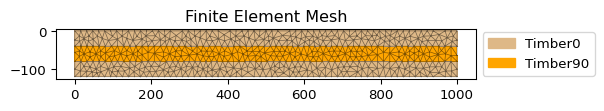

<Axes: title={'center': 'Finite Element Mesh'}>

In [4]:
geom.create_mesh(mesh_sizes=[200])
sec = Section(geometry=geom)
sec.plot_mesh()

### Perform an Analysis

We perform only a geometric analysis on the reinforced concrete section.

In [5]:
sec.calculate_geometric_properties()

### Calculate Gross Effective Moment of Inertia

We can calculate the gross effective moment of inertia by obtaining the flexural rigidity ($\sum E.I$) of the section and dividing it by the elastic modulus of the concrete. We compare this to the moment of inertia of a rectangular section of the same dimensions.

In [8]:
ei = sec.get_eic(e_ref=timber0)
print(f"I_eff,x = {ei[0]:.3e} mm6")
print(f"I_eff,y = {ei[1]:.3e} mm6")

I_eff,x = 1.388e+08 mm6
I_eff,y = 6.778e+09 mm6
